In [ ]:
# https://www.learnpythonwithrune.org/how-to-calculate-volatility-as-average-true-range-atr-with-python-dataframes-and-numpy/
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# get data
start = dt.datetime(2020, 1, 1)
data = pdr.get_data_yahoo("002002.SZ", start)# SH -> SS

In [63]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,4.25,4.16,4.19,4.23,27078876.0,4.161123
2020-01-03,4.27,4.21,4.23,4.23,22938822.0,4.161123
2020-01-06,4.28,4.19,4.22,4.24,28259188.0,4.170960
2020-01-07,4.32,4.22,4.24,4.28,36838152.0,4.210309
2020-01-08,4.28,4.14,4.28,4.16,37742584.0,4.092263
...,...,...,...,...,...,...
2021-12-31,6.16,6.04,6.10,6.06,91456276.0,6.060000
2022-01-04,6.34,5.98,6.08,6.30,222253706.0,6.300000
2022-01-05,6.38,6.07,6.28,6.15,173215348.0,6.150000


In [64]:
# calculate ATR
high_low = data['High'] - data['Low']
high_cp = np.abs(data['High'] - data['Close'].shift())
low_cp = np.abs(data['Low'] - data['Close'].shift())

df = pd.concat([high_low, high_cp, low_cp], axis=1)
true_range = np.max(df, axis=1)

average_true_range = true_range.rolling(20).mean()

In [65]:
average_true_range

Date
2020-01-02       NaN
2020-01-03       NaN
2020-01-06       NaN
2020-01-07       NaN
2020-01-08       NaN
               ...  
2021-12-31    0.2170
2022-01-04    0.2265
2022-01-05    0.2245
2022-01-06    0.2325
2022-01-07    0.2320
Length: 490, dtype: float64

<IPython.core.display.Javascript object>


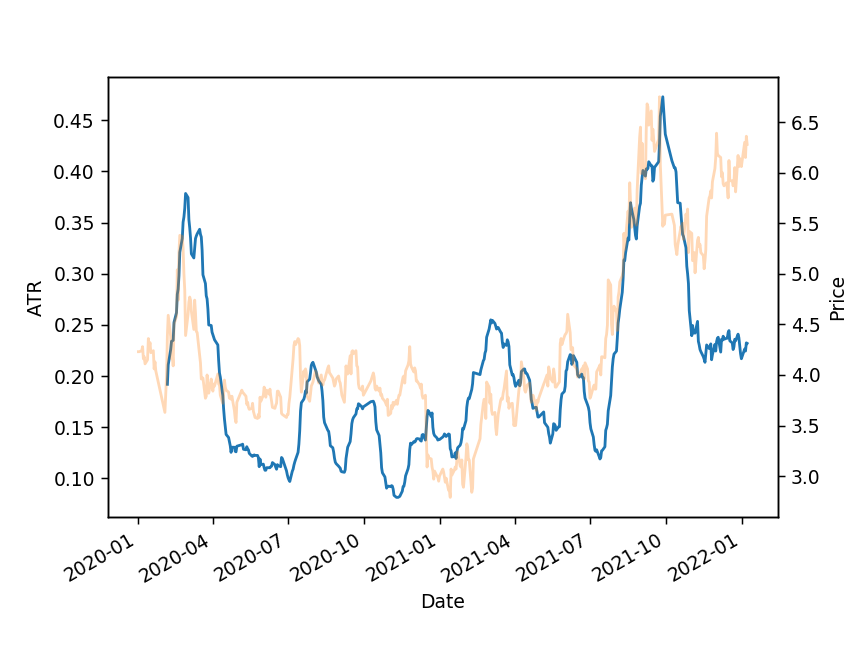

Text(0, 0.5, 'Price')

In [66]:
# plot ATR
%matplotlib notebook

fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")

In [46]:
# close_50 = data['Close'][-50:]
# np.max(close_50)

# index = np.argsort(-1*close_50) # argsort(from small to big); output index
# index

In [67]:
data[-20:].sort_values('Close')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-15,5.93,5.69,5.80,5.75,133489915.0,5.75
2021-12-24,6.09,5.80,6.01,5.81,154881281.0,5.81
2021-12-14,5.97,5.82,5.92,5.85,94167692.0,5.85
2021-12-10,5.92,5.83,5.86,5.87,84894928.0,5.87
2021-12-21,5.91,5.82,5.91,5.87,83471628.0,5.87
2021-12-13,6.00,5.85,5.86,5.90,127159202.0,5.90
2021-12-22,5.97,5.72,5.86,5.90,132287757.0,5.90
2021-12-17,6.08,5.91,6.08,5.92,160086142.0,5.92
2021-12-20,6.06,5.83,5.94,5.92,128937654.0,5.92
